In [22]:
!nvidia-smi

Wed Jul 17 09:42:14 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.01    Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P8     2W /  N/A |    635MiB /  4096MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

PyTorch is a python package that provides two high-level features:


*   Tensor computation (like numpy) with strong GPU acceleration
*   Deep Neural Networks built on a tape-based autograd system

You can reuse your favorite python packages such as numpy, scipy and Cython to
extend PyTorch when needed.

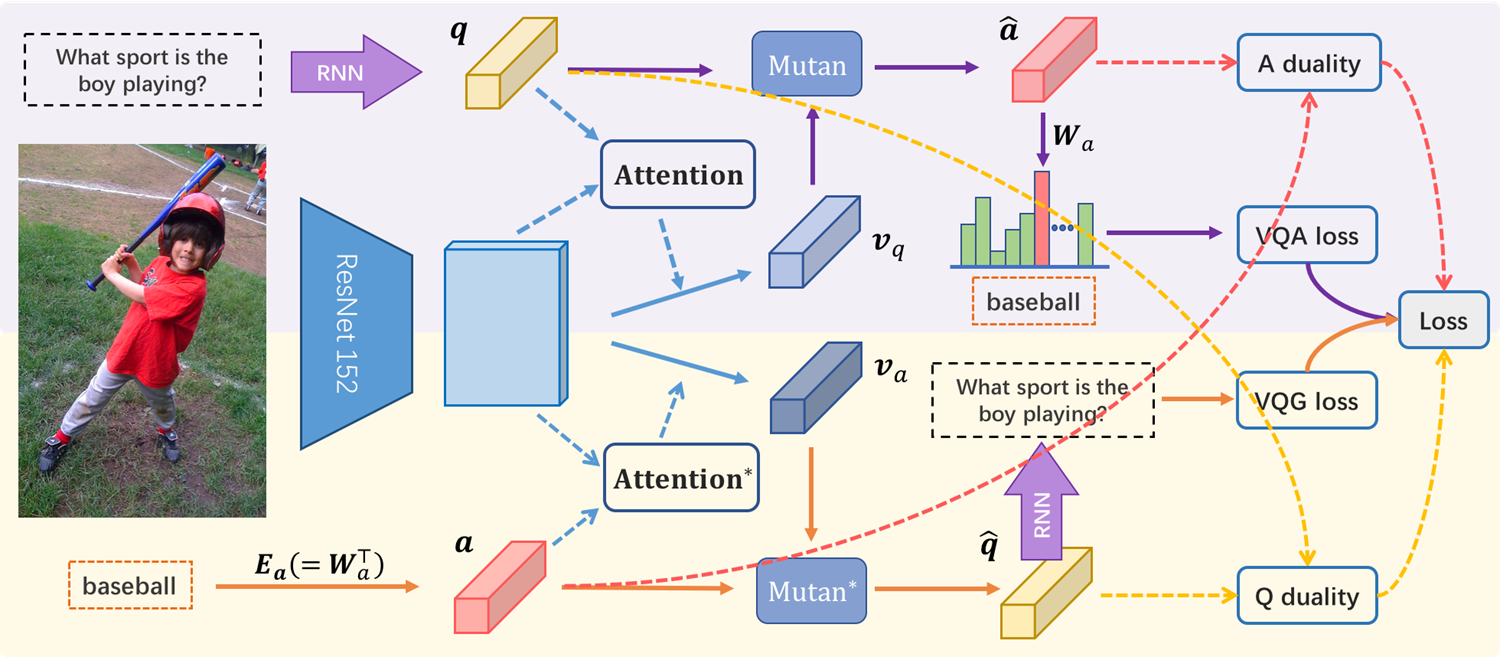

# 🔶**Section 0: `Import PyTorch` 💣**

## Hi pytorch 🤗

In [1]:
import torch

# 🔶**Section 1: `Tensor` ⚡**

## Scalar
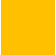

Define a scalar

In [2]:
scalar = torch.tensor(2.5)
scalar

tensor(2.5000)

## Vector
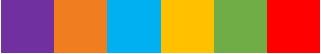

Define a 1*4 tensor

In [3]:
vector = torch.tensor([1, 2.5, 3, -1])
vector

tensor([ 1.0000,  2.5000,  3.0000, -1.0000])

## Matrix
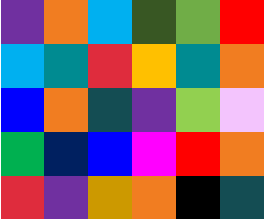

Define a 2*3 tensor

In [4]:
mat = torch.tensor([
    [1, 2, 3],
    [4, 5, 6]
])
mat

tensor([[1, 2, 3],
        [4, 5, 6]])

## Column vector
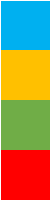

Define a 4*1 tensor

In [5]:
col_vec = torch.tensor([
    [1],
    [2],
    [3],
    [4]
])
col_vec

tensor([[1],
        [2],
        [3],
        [4]])

## Tensor
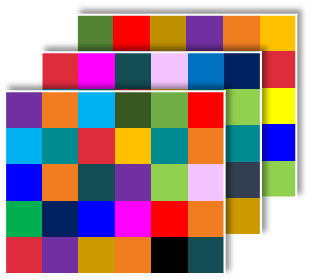

Define a 2* 2* 2 tensor

In [6]:
tensor_3d = torch.tensor([
    [[2, 3],
     [1, 2]],

    [[1, 2],
     [3, 4]]
])
tensor_3d

tensor([[[2, 3],
         [1, 2]],

        [[1, 2],
         [3, 4]]])

## Data Type 🗂️

[List of data types in pytorch](https://pytorch.org/docs/stable/tensors.html)

Get data type of tensors defined in the previous cells

In [ ]:
# default (float number) -> numpy = float64, pytorch = float32

In [8]:
scalar.dtype, vector.dtype

(torch.float32, torch.float32)

In [9]:
mat.dtype

torch.int64

Define a uint8 tensor

In [15]:
vec_uint = torch.tensor([1, 2], dtype=torch.uint8)   # torch.float = torch.float32
vec_uint

tensor([1, 2], dtype=torch.uint8)

## Convert ↔️

Change `vec_uint` type to float

In [16]:
vec_uint = vec_uint.float()
vec_uint

tensor([1., 2.])

In [17]:
vec_uint.type(torch.float16)

tensor([1., 2.], dtype=torch.float16)

## Device 💻

In [20]:
vec = torch.tensor([1, 2])
vec, vec.device

(tensor([1, 2]), device(type='cpu'))

In [21]:
vec = torch.tensor([1, 2], device='cuda')
vec, vec.device

(tensor([1, 2], device='cuda:0'), device(type='cuda', index=0))

move `vec_uint` tensor to gpu

In [23]:
vec_uint

tensor([1., 2.])

In [24]:
vec_uint = vec_uint.cuda()
vec_uint

tensor([1., 2.], device='cuda:0')

In [25]:
vec_uint = vec_uint.cpu()
vec_uint

tensor([1., 2.])

# 🔶**Section 2: Tensor Attributes and Methods ⚽**

In [29]:
vector.__class__

torch.Tensor

## .shape

In [31]:
tensor_3d.shape, tensor_3d.shape[0]

(torch.Size([2, 2, 2]), 2)

## .size()

In [33]:
vector.size(), tensor_3d.shape

(torch.Size([4]), torch.Size([2, 2, 2]))

In [34]:
mat.size(1)

3

## .min() & .max()

In [35]:
tensor_3d.min()

tensor(1)

In [36]:
tensor_3d.max()

tensor(4)

## .mean() & .std()

In [37]:
vec.mean()

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [38]:
vec.float().mean()

tensor(1.5000, device='cuda:0')

In [39]:
vec.float().std()

tensor(0.7071, device='cuda:0')

In [40]:
vec.abs()

tensor([1, 2], device='cuda:0')

## .t()

In [43]:
mat = mat.t()
mat.shape

torch.Size([3, 2])

## and soooo on...

In [46]:
vec = torch.tensor([1.33, 2.59])
vec

tensor([1.3300, 2.5900])

In [47]:
vec.ceil()

tensor([2., 3.])

In [48]:
vec

tensor([1.3300, 2.5900])

In [49]:
vec.ceil_() # overwrite

tensor([2., 3.])

In [50]:
vec

tensor([2., 3.])

# 🔶**Section 3: Special Arrays ☕**

create a 2\*3 tensor of ones

In [53]:
ones = torch.ones((2, 3), dtype=torch.int16, device='cuda')
ones

tensor([[1, 1, 1],
        [1, 1, 1]], device='cuda:0', dtype=torch.int16)

create a 2\*2\*3 tensor of zeros

In [54]:
torch.zeros((2, 2, 3))

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

create a 5\*5 identity tensor

In [55]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [56]:
torch.eye(5, 6)

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.]])

create a 5\*4 identity tensor with `int` type

In [61]:
e = torch.eye(5, 4, dtype=torch.int)
e

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]], dtype=torch.int32)

create an empty 3\*3 tensor

In [59]:
em_vec = torch.empty((3, 3))
em_vec

tensor([[4.6679e-05, 3.0625e-41, 1.9169e-26],
        [3.0625e-41, 1.1210e-43, 0.0000e+00],
        [1.1210e-43, 0.0000e+00, 6.8863e+27]])

fill `em_vec` with scalar value 1.2

In [60]:
em_vec.fill_(1.2)

tensor([[1.2000, 1.2000, 1.2000],
        [1.2000, 1.2000, 1.2000],
        [1.2000, 1.2000, 1.2000]])

In [62]:
e.fill_(0.1)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

fill `em_vec` with the scalar value 0

In [63]:
em_vec.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

full

In [64]:
torch.full((4, 2, 3), fill_value=2.)

tensor([[[2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.]]])

create a zero vector with the same size as `col_vec`

In [65]:
torch.zeros_like(col_vec)

tensor([[0],
        [0],
        [0],
        [0]])

# 🔶**Section 4: Random Arrays ♾**

## create a 2\*3 tensor filled with random numbers from a uniform distribution on the interval [0, 1)

In [69]:
torch.rand((2, 3))

tensor([[0.4868, 0.6855, 0.1801],
        [0.1788, 0.5089, 0.6799]])

## create a 3\*3\*2 tensor filled with random numbers from a normal distribution with mean 0 and variance 1

In [70]:
torch.randn((3, 3, 2))

tensor([[[-0.7096,  0.9289],
         [-1.2146,  0.4159],
         [-0.0085,  1.7590]],

        [[ 0.0774,  0.5375],
         [-0.3717,  0.5560],
         [-1.8785, -0.7370]],

        [[-0.3289,  1.3537],
         [ 0.0294, -0.2123],
         [-0.4152, -0.2388]]])

## visualize

In [71]:
import matplotlib.pyplot as plt

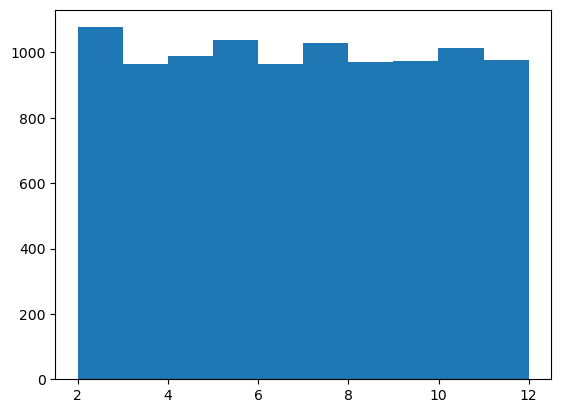

In [73]:
rand_uniform = 10 * torch.rand(10000) + 2
plt.hist(rand_uniform);

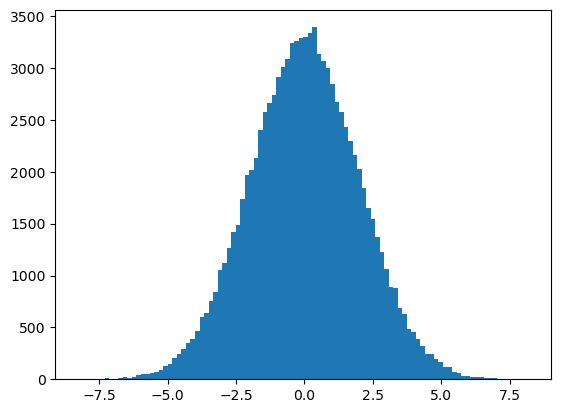

In [75]:
rand_gauss = 2 * torch.randn(100000)
plt.hist(rand_gauss, bins=100);

## create a random tensor with integer numbers

In [78]:
torch.randint(low=2, high=12, size=(2, 5))  # uniform

tensor([[ 6,  3,  7, 10,  4],
        [ 2,  3,  8,  9, 11]])

## create a random permutation of integers from 0 to 9

In [79]:
torch.randperm(n=10)

tensor([9, 3, 2, 8, 0, 7, 1, 6, 5, 4])

## Set the seed for generating random numbers

In [86]:
torch.manual_seed(62)
torch.randperm(10)

tensor([8, 6, 3, 1, 7, 9, 0, 4, 5, 2])

# 🔶**Section 5: Indexing & Slicing 😘**

## Indexing

### sample vector

In [91]:
a = torch.randn(5)
a

tensor([-1.6113,  0.9961,  0.1304, -0.5399, -0.5944])

get first element

In [92]:
a[0]

tensor(-1.6113)

get last element

In [93]:
a[4]

tensor(-0.5944)

In [94]:
a[-1], a[-2]

(tensor(-0.5944), tensor(-0.5399))

### sample matrix

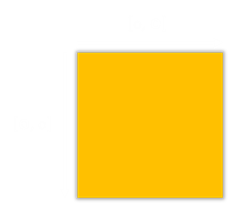

In [95]:
b = torch.rand(5, 3)
b

tensor([[0.1866, 0.1910, 0.2166],
        [0.1705, 0.0580, 0.3870],
        [0.9901, 0.4379, 0.9194],
        [0.2395, 0.1733, 0.4996],
        [0.2071, 0.5162, 0.5447]])

get (1, 2)

In [96]:
b[1, 2]

tensor(0.3870)

get second row

In [97]:
b[2]

tensor([0.9901, 0.4379, 0.9194])

In [98]:
b[2][0]

tensor(0.9901)

### sample tensor

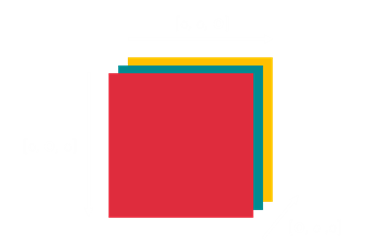

In [99]:
c = torch.randint(100, (4, 5, 3))
c

tensor([[[57, 64, 75],
         [47, 84, 56],
         [24, 37, 74],
         [66,  9, 80],
         [87, 21, 88]],

        [[47, 62, 32],
         [86, 62, 91],
         [56, 34, 14],
         [60, 44, 83],
         [50, 24, 31]],

        [[22, 92, 53],
         [54, 38, 78],
         [83, 10, 14],
         [99, 66, 69],
         [83, 22, 38]],

        [[73, 15, 57],
         [62, 55, 33],
         [47, 54,  7],
         [91, 13,  9],
         [ 8, 89, 44]]])

get (0, 0, 0), (2, 3, 1) and (3, 4, 2) elements

In [100]:
c[0, 0, 0], c[2, 3, 1], c[3, 4, 2]

(tensor(57), tensor(66), tensor(44))

In [101]:
c[0]

tensor([[57, 64, 75],
        [47, 84, 56],
        [24, 37, 74],
        [66,  9, 80],
        [87, 21, 88]])

## Slicing

### sample vector

In [102]:
a = torch.randn(10)
a

tensor([-1.1900,  0.1254,  0.2700, -0.2927, -0.2402,  0.7297,  1.8010,  0.3504,
        -0.6736, -0.5233])

[4:8]

In [103]:
a[4:8]

tensor([-0.2402,  0.7297,  1.8010,  0.3504])

[0:1]

In [104]:
a[0:1]

tensor([-1.1900])

[0:-1]

In [105]:
a[0:-1]

tensor([-1.1900,  0.1254,  0.2700, -0.2927, -0.2402,  0.7297,  1.8010,  0.3504,
        -0.6736])

[-2:-1]

In [106]:
a[-2:-1]

tensor([-0.6736])

[4:]

In [107]:
a[4:]

tensor([-0.2402,  0.7297,  1.8010,  0.3504, -0.6736, -0.5233])

[:3]

In [109]:
a[:3]

tensor([-1.1900,  0.1254,  0.2700])

[::2]

In [111]:
a

tensor([-1.1900,  0.1254,  0.2700, -0.2927, -0.2402,  0.7297,  1.8010,  0.3504,
        -0.6736, -0.5233])

In [110]:
a[::2]

tensor([-1.1900,  0.2700, -0.2402,  1.8010, -0.6736])

[1::3]

In [112]:
a[1::3]

tensor([ 0.1254, -0.2402,  0.3504])

[[0, 2, 4]]

In [113]:
a[[0, 2, 4]]

tensor([-1.1900,  0.2700, -0.2402])

### sample matrix

In [114]:
b = torch.randn(3,5)
b

tensor([[-0.2322, -0.4282,  0.6252,  1.5870, -1.2716],
        [ 2.0816, -0.2035,  0.7628,  0.1010,  0.7714],
        [-0.1378,  0.6597, -0.6635,  0.7619, -1.7864]])

[0:3, 2:-1]

In [115]:
b[0:3, 2:-1]

tensor([[ 0.6252,  1.5870],
        [ 0.7628,  0.1010],
        [-0.6635,  0.7619]])

[0:2]

In [116]:
b[0:2]

tensor([[-0.2322, -0.4282,  0.6252,  1.5870, -1.2716],
        [ 2.0816, -0.2035,  0.7628,  0.1010,  0.7714]])

[0:2, :]

In [117]:
b[0:2, :]

tensor([[-0.2322, -0.4282,  0.6252,  1.5870, -1.2716],
        [ 2.0816, -0.2035,  0.7628,  0.1010,  0.7714]])

[::2, 2:]

In [118]:
b[::2, 2:]

tensor([[ 0.6252,  1.5870, -1.2716],
        [-0.6635,  0.7619, -1.7864]])

### sample tensor

In [119]:
c = torch.randn(4, 6, 7)
c

tensor([[[-0.9945, -0.6813,  0.3404, -0.3236,  0.9431, -0.4833, -1.2233],
         [-0.3777, -1.2679, -1.6041, -0.0101,  0.1042, -1.8981, -1.5732],
         [-1.9005,  1.0874, -1.0686,  1.0112,  0.1772, -0.8361, -1.3936],
         [-2.2776, -0.3059,  0.9856, -0.0880, -1.2346, -2.4005, -0.5173],
         [ 1.3597,  0.2907, -0.0957, -0.8163, -1.9586, -1.4494, -1.1556],
         [ 2.1238,  0.4648, -0.4438,  1.7458, -1.3583,  1.6922, -0.1119]],

        [[-1.2764, -0.1781, -0.3893,  0.7325, -0.0041,  0.2195, -0.1371],
         [ 0.1507,  0.7417, -0.5325, -0.0786,  1.1997,  0.3915, -0.9942],
         [-1.3117, -0.4385, -0.5633,  1.2592,  1.4163, -0.7415,  0.7091],
         [-0.3060,  1.0688,  0.5520,  0.5081, -0.8039, -1.4540, -1.4411],
         [ 2.4374, -1.4318, -2.7397,  2.4173,  1.2266,  2.0036,  0.3595],
         [-0.6626,  1.2976,  0.0727,  1.1784, -0.5917, -0.1048, -0.1323]],

        [[ 1.7494,  0.2154,  0.6811, -0.9837,  0.1571,  0.3398,  0.0426],
         [-1.4400,  0.1333,  0.504

[1:2, 3:5, 2:4]

In [120]:
c[1:2, 3:5, 2:4]

tensor([[[ 0.5520,  0.5081],
         [-2.7397,  2.4173]]])

[1:3, :, -1]

In [121]:
c[1:3, :, -1]

tensor([[-0.1371, -0.9942,  0.7091, -1.4411,  0.3595, -0.1323],
        [ 0.0426, -0.1613,  1.1284,  1.0953, -0.8403,  0.2179]])

[1]

In [122]:
c[1]

tensor([[-1.2764, -0.1781, -0.3893,  0.7325, -0.0041,  0.2195, -0.1371],
        [ 0.1507,  0.7417, -0.5325, -0.0786,  1.1997,  0.3915, -0.9942],
        [-1.3117, -0.4385, -0.5633,  1.2592,  1.4163, -0.7415,  0.7091],
        [-0.3060,  1.0688,  0.5520,  0.5081, -0.8039, -1.4540, -1.4411],
        [ 2.4374, -1.4318, -2.7397,  2.4173,  1.2266,  2.0036,  0.3595],
        [-0.6626,  1.2976,  0.0727,  1.1784, -0.5917, -0.1048, -0.1323]])

[..., 1]

In [123]:
c[..., 1]

tensor([[-0.6813, -1.2679,  1.0874, -0.3059,  0.2907,  0.4648],
        [-0.1781,  0.7417, -0.4385,  1.0688, -1.4318,  1.2976],
        [ 0.2154,  0.1333, -1.6680,  0.4154,  0.1934,  1.2941],
        [ 1.9436, -0.7638, -0.3296,  0.1541,  0.0853, -1.4908]])

# 🔶**Section 6: Math Operations 🏹**

## sample matrices

In [124]:
a = torch.randint(10, (2,2))
a

tensor([[9, 8],
        [0, 3]])

In [125]:
b = torch.randint(10, (2,2))
b

tensor([[9, 9],
        [6, 3]])

## Addition

In [126]:
a + b

tensor([[18, 17],
        [ 6,  6]])

## Subtraction

In [127]:
a - b

tensor([[ 0, -1],
        [-6,  0]])

## Multiplication

In [128]:
a * b

tensor([[81, 72],
        [ 0,  9]])

## Division

In [129]:
a / b

tensor([[1.0000, 0.8889],
        [0.0000, 1.0000]])

## Matrix Multiplication

In [130]:
torch.matmul(a, b)

tensor([[129, 105],
        [ 18,   9]])

In [131]:
a @ b

tensor([[129, 105],
        [ 18,   9]])

In [132]:
a * b

tensor([[81, 72],
        [ 0,  9]])

## Broadcasting

### Sum a vector with a scalar

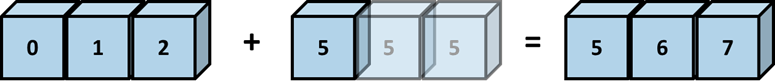

In [133]:
a = torch.randint(10, (1, 2, 3))
a

tensor([[[9, 8, 5],
         [5, 5, 2]]])

In [134]:
a + 2.

tensor([[[11., 10.,  7.],
         [ 7.,  7.,  4.]]])

### Sum a matrix with a vector
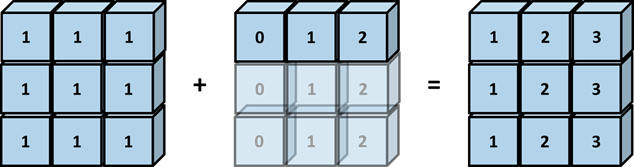

In [136]:
a = torch.ones(3, 3)
b = torch.arange(0, 3)
a + b

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

In [137]:
torch.linspace(0, 3, 100)

tensor([0.0000, 0.0303, 0.0606, 0.0909, 0.1212, 0.1515, 0.1818, 0.2121, 0.2424,
        0.2727, 0.3030, 0.3333, 0.3636, 0.3939, 0.4242, 0.4545, 0.4848, 0.5152,
        0.5455, 0.5758, 0.6061, 0.6364, 0.6667, 0.6970, 0.7273, 0.7576, 0.7879,
        0.8182, 0.8485, 0.8788, 0.9091, 0.9394, 0.9697, 1.0000, 1.0303, 1.0606,
        1.0909, 1.1212, 1.1515, 1.1818, 1.2121, 1.2424, 1.2727, 1.3030, 1.3333,
        1.3636, 1.3939, 1.4242, 1.4545, 1.4848, 1.5152, 1.5455, 1.5758, 1.6061,
        1.6364, 1.6667, 1.6970, 1.7273, 1.7576, 1.7879, 1.8182, 1.8485, 1.8788,
        1.9091, 1.9394, 1.9697, 2.0000, 2.0303, 2.0606, 2.0909, 2.1212, 2.1515,
        2.1818, 2.2121, 2.2424, 2.2727, 2.3030, 2.3333, 2.3636, 2.3939, 2.4242,
        2.4545, 2.4848, 2.5152, 2.5455, 2.5758, 2.6061, 2.6364, 2.6667, 2.6970,
        2.7273, 2.7576, 2.7879, 2.8182, 2.8485, 2.8788, 2.9091, 2.9394, 2.9697,
        3.0000])

### (5, 4, 3, 1) & (3, 1, 1)    `Can't broadcast`
- 1 & 1 = equal
- 3 & 1 = not equal but one of them is one
- 4 & 3 = not equal and not one

# 🔶**Section 7: Dimension Transformation**

## sample tensors

In [138]:
a = torch.randn(2, 6)
b = torch.randn(3)

In [139]:
b

tensor([-1.5288,  0.0822, -0.2134])

In [140]:
a

tensor([[ 0.4576, -0.6877,  0.1942, -0.4242, -1.1372, -1.2740],
        [-0.7266, -0.4047, -0.6562, -2.0773,  0.7276, -0.4005]])

## Reshape `a` into a (2, 3, 2) tensor using `view`

In [141]:
a.view(2, 3, 2)

tensor([[[ 0.4576, -0.6877],
         [ 0.1942, -0.4242],
         [-1.1372, -1.2740]],

        [[-0.7266, -0.4047],
         [-0.6562, -2.0773],
         [ 0.7276, -0.4005]]])

In [142]:
a.view(2, 3, 3)

RuntimeError: shape '[2, 3, 3]' is invalid for input of size 12

## Reshape `a` into a (2, 3, 2) tensor using `reshape`

In [143]:
a.reshape(2, 3, 2)

tensor([[[ 0.4576, -0.6877],
         [ 0.1942, -0.4242],
         [-1.1372, -1.2740]],

        [[-0.7266, -0.4047],
         [-0.6562, -2.0773],
         [ 0.7276, -0.4005]]])

## Transform tensor to a vector

In [144]:
a.view(-1), a.reshape(-1)

(tensor([ 0.4576, -0.6877,  0.1942, -0.4242, -1.1372, -1.2740, -0.7266, -0.4047,
         -0.6562, -2.0773,  0.7276, -0.4005]),
 tensor([ 0.4576, -0.6877,  0.1942, -0.4242, -1.1372, -1.2740, -0.7266, -0.4047,
         -0.6562, -2.0773,  0.7276, -0.4005]))

## Repeat b 3 times using `repeat`

In [145]:
b

tensor([-1.5288,  0.0822, -0.2134])

In [149]:
b.repeat(3, 1)

tensor([[-1.5288,  0.0822, -0.2134],
        [-1.5288,  0.0822, -0.2134],
        [-1.5288,  0.0822, -0.2134]])

In [150]:
b.repeat(2, 3, 2)

tensor([[[-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134],
         [-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134],
         [-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134]],

        [[-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134],
         [-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134],
         [-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134]]])

## Repeat b twice using `cat`

In [151]:
torch.cat((b, b))

tensor([-1.5288,  0.0822, -0.2134, -1.5288,  0.0822, -0.2134])

In [152]:
torch.cat((a, a), dim=1)

tensor([[ 0.4576, -0.6877,  0.1942, -0.4242, -1.1372, -1.2740,  0.4576, -0.6877,
          0.1942, -0.4242, -1.1372, -1.2740],
        [-0.7266, -0.4047, -0.6562, -2.0773,  0.7276, -0.4005, -0.7266, -0.4047,
         -0.6562, -2.0773,  0.7276, -0.4005]])

## Transform `a` to a (2, 1, 6) tensor using `unsqueeze`

In [153]:
a.unsqueeze(0).shape

torch.Size([1, 2, 6])

In [154]:
a.unsqueeze(1).shape

torch.Size([2, 1, 6])

In [155]:
a.unsqueeze(2).shape

torch.Size([2, 6, 1])

## Remove dimensions of size 1 

In [157]:
a = a.unsqueeze(2)
a.shape

torch.Size([2, 6, 1, 1])

In [158]:
a.squeeze(-1).shape

torch.Size([2, 6, 1])

In [159]:
a.squeeze().shape

torch.Size([2, 6])

# 🔶**Section 8: Built-in Funtions ⛽**

## sample arrays

In [160]:
a = torch.randint(10, (5,))
a

tensor([7, 5, 9, 2, 4])

In [161]:
b = torch.randint(10, (2, 2))
b

tensor([[0, 5],
        [1, 4]])

In [162]:
c = 10 * torch.rand((2, 3, 3))
c

tensor([[[1.3566, 4.8507, 5.4347],
         [8.4518, 2.5609, 4.5213],
         [7.4527, 2.2851, 7.8607]],

        [[3.0786, 1.4215, 3.5934],
         [0.4178, 5.7417, 8.9717],
         [9.5076, 3.4002, 3.5929]]])

## torch.sum()

In [163]:
torch.sum(c), torch.sum(b, 0), torch.sum(b, 1)

(tensor(84.4998), tensor([1, 9]), tensor([5, 5]))

## torch.cumsum()

In [164]:
a

tensor([7, 5, 9, 2, 4])

In [165]:
torch.cumsum(a, 0)

tensor([ 7, 12, 21, 23, 27])

## torch.diff()

In [166]:
torch.diff(a)

tensor([-2,  4, -7,  2])

## torch.prod()

In [168]:
torch.prod(b, 1)

tensor([0, 4])

## torch.cumprod()

In [169]:
torch.cumprod(a, 0)

tensor([   7,   35,  315,  630, 2520])

## torch.sqrt()

In [170]:
torch.sqrt(a)

tensor([2.6458, 2.2361, 3.0000, 1.4142, 2.0000])

## torch.remainder()

In [171]:
torch.remainder(a, 5)

tensor([2, 0, 4, 2, 4])

## torch.round()

In [172]:
c

tensor([[[1.3566, 4.8507, 5.4347],
         [8.4518, 2.5609, 4.5213],
         [7.4527, 2.2851, 7.8607]],

        [[3.0786, 1.4215, 3.5934],
         [0.4178, 5.7417, 8.9717],
         [9.5076, 3.4002, 3.5929]]])

In [173]:
torch.round(c)

tensor([[[ 1.,  5.,  5.],
         [ 8.,  3.,  5.],
         [ 7.,  2.,  8.]],

        [[ 3.,  1.,  4.],
         [ 0.,  6.,  9.],
         [10.,  3.,  4.]]])

## torch.ceil()

In [174]:
torch.ceil(c)

tensor([[[ 2.,  5.,  6.],
         [ 9.,  3.,  5.],
         [ 8.,  3.,  8.]],

        [[ 4.,  2.,  4.],
         [ 1.,  6.,  9.],
         [10.,  4.,  4.]]])

## torch.floor()

In [175]:
torch.floor(c)

tensor([[[1., 4., 5.],
         [8., 2., 4.],
         [7., 2., 7.]],

        [[3., 1., 3.],
         [0., 5., 8.],
         [9., 3., 3.]]])

## torch.fix()

In [176]:
torch.fix(c)

tensor([[[1., 4., 5.],
         [8., 2., 4.],
         [7., 2., 7.]],

        [[3., 1., 3.],
         [0., 5., 8.],
         [9., 3., 3.]]])

## torch.norm()

In [177]:
torch.norm(c, 2)

tensor(22.9957)

In [178]:
torch.norm(a.float(), p=2)

tensor(13.2288)

## torch.dist()

In [179]:
torch.dist(c, torch.tensor(5))

tensor(11.5674)

## torch.mean()

In [180]:
torch.mean(c)

tensor(4.6944)

In [181]:
torch.mean(c, dim=1)

tensor([[5.7537, 3.2322, 5.9389],
        [4.3347, 3.5211, 5.3860]])

## torch.std()

In [182]:
torch.std(c)

tensor(2.7878)

## torch.var()

In [183]:
torch.var(c)

tensor(7.7720)

## torch.exp()

In [184]:
torch.exp(c)

tensor([[[3.8828e+00, 1.2783e+02, 2.2923e+02],
         [4.6837e+03, 1.2947e+01, 9.1955e+01],
         [1.7244e+03, 9.8266e+00, 2.5933e+03]],

        [[2.1729e+01, 4.1432e+00, 3.6357e+01],
         [1.5186e+00, 3.1160e+02, 7.8774e+03],
         [1.3461e+04, 2.9969e+01, 3.6338e+01]]])

## torch.log()

In [185]:
torch.log(torch.exp(c))

tensor([[[1.3566, 4.8507, 5.4347],
         [8.4518, 2.5609, 4.5213],
         [7.4527, 2.2851, 7.8607]],

        [[3.0786, 1.4215, 3.5934],
         [0.4178, 5.7417, 8.9717],
         [9.5076, 3.4002, 3.5929]]])

## torch.min()

In [186]:
torch.min(c)

tensor(0.4178)

In [187]:
torch.min(c, dim=1)

torch.return_types.min(
values=tensor([[1.3566, 2.2851, 4.5213],
        [0.4178, 1.4215, 3.5929]]),
indices=tensor([[0, 2, 1],
        [1, 0, 2]]))

## torch.max()

In [188]:
torch.max(c, dim=1)

torch.return_types.max(
values=tensor([[8.4518, 4.8507, 7.8607],
        [9.5076, 5.7417, 8.9717]]),
indices=tensor([[1, 0, 2],
        [2, 1, 1]]))

## torch.argmin()

In [189]:
torch.argmin(c)

tensor(12)

## torch.argmax()

In [190]:
torch.argmax(c)

tensor(15)

## torch.topk()

In [191]:
a

tensor([7, 5, 9, 2, 4])

In [192]:
torch.topk(a, 2)

torch.return_types.topk(
values=tensor([9, 7]),
indices=tensor([2, 0]))

In [193]:
torch.topk(a, 2, largest=False)

torch.return_types.topk(
values=tensor([2, 4]),
indices=tensor([3, 4]))

## torch.mode()

In [194]:
torch.mode(a)

torch.return_types.mode(
values=tensor(2),
indices=tensor(3))

## torch.median()

In [195]:
torch.median(a)

tensor(5)

# 🔶**Section 9:  torch ↔️ numpy**

## torch to numpy

In [196]:
a

tensor([7, 5, 9, 2, 4])

In [198]:
a.numpy()

array([7, 5, 9, 2, 4])

In [199]:
a = a.cuda()
a

tensor([7, 5, 9, 2, 4], device='cuda:0')

In [200]:
a.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [201]:
a.cpu().numpy()

array([7, 5, 9, 2, 4])

## numpy to torch

In [202]:
import numpy as np

In [203]:
b = np.array([1, 2, 3])
b

array([1, 2, 3])

In [206]:
torch.tensor(b), torch.tensor(b).dtype

(tensor([1, 2, 3]), torch.int64)

In [207]:
torch.from_numpy(b), torch.from_numpy(b).dtype

(tensor([1, 2, 3]), torch.int64)